In [79]:
import scipy 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
import time
%matplotlib inline


## Parameters 


In [58]:
tau = 0.01
delta = 0.01
n_max = 100
i_max = 1000
gamma = 100
epsilon = 100
kappa = 0.01
num_init_agents = 500

rv = stats.cauchy()


772 -9.68732290285 513.280723553 9.89914414787


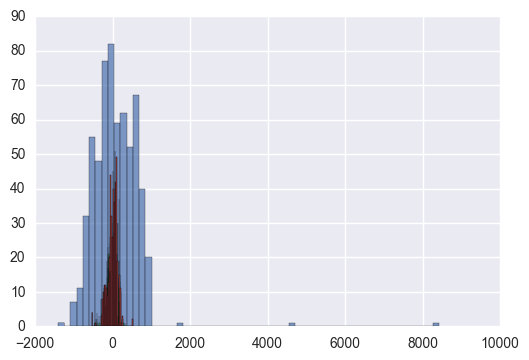

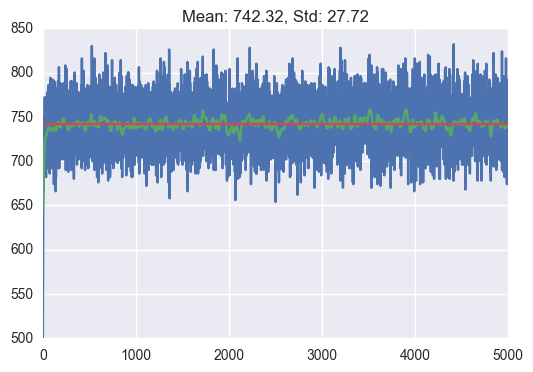

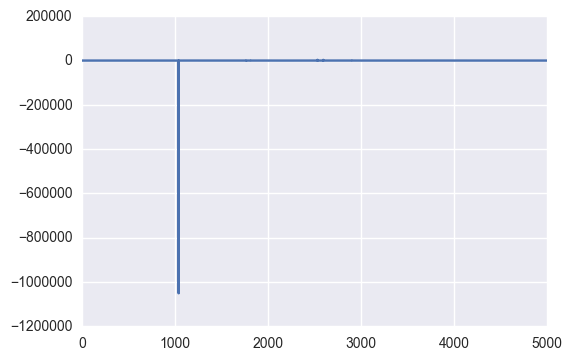

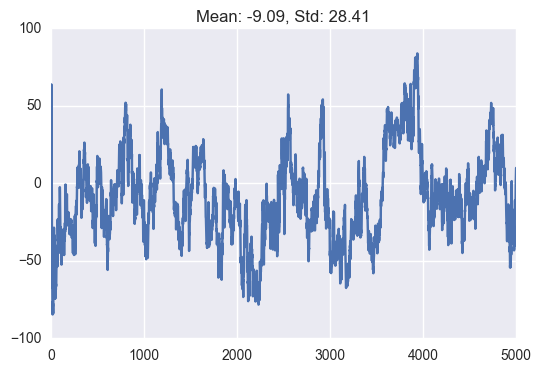

In [59]:
agents = np.array([np.random.randint(-1000, 1000) for i in range(num_init_agents)])
num_agents = num_init_agents
kappa = 1.0 / (3 * num_init_agents)
epsilon = 1.0/ (3 * np.max(agents **2))

n_max = 5000
population_mass = [agents.size]
mean_pheno = [agents.mean()]
median_pheno = [np.median(agents)]
for n in range(n_max):
    new_agents = []
    removed_index = []

    for i in range(num_agents):
        dn = kappa * num_agents + epsilon * (agents[i] ** 2)
        bn = gamma
        rand = np.random.rand()
        if rand < dn:
            removed_index.append(i)
        elif rand >= dn and rand < dn + bn:
            new_agents.append(agents[i])
    agents = np.delete(agents, removed_index, axis=0)
    agents = np.append(agents, new_agents)
    num_agents = num_agents - len(removed_index) + len(new_agents)
    assert num_agents == agents.size
    agents = agents + rv.rvs(agents.size)
    population_mass.append(agents.size)
    mean_pheno.append(agents.mean())
    median_pheno.append(np.median(agents))
    
    if n % (n_max //2) == 1:
        plt.hist(agents, bins = agents.size/10, alpha = 0.7)

print agents.size, agents.mean(), agents.max(), np.median(agents)
hist = plt.hist(agents, bins = agents.size / 10)
plt.figure()
time_axis = range(n_max +1)
plt.plot(time_axis, population_mass)
plt.plot(time_axis, scipy.ndimage.gaussian_filter1d(population_mass, sigma=np.log(n_max)))
plt.plot([0, n_max], np.ones(2) * np.mean(population_mass))
plt.title("Mean: %.2f, Std: %.2f" % (np.mean(population_mass), np.std(population_mass)))
plt.figure()
plt.plot(time_axis, mean_pheno)
plt.figure()
plt.plot(time_axis, median_pheno)
plt.title("Mean: %.2f, Std: %.2f" % (np.mean(median_pheno), np.std(median_pheno)))


In [189]:
def plot_series(series, ax=None, x=None, title=''):
    if x == None:
        x = range(len(series))
    ax.plot(x, series)
    ax.set_title("%s \nMean: %.2f Median: %.2f Std: %.2f" % (title, np.mean(series), np.median(series), np.std(series)))
    return ax

In [74]:
type(np.array([1,2])) == np.array

False

In [89]:
class Simulate(object):
    def __init__(self, num_init_agents=1000, birth_rate=None, death_rate=None, selection_penalty=None, 
                 num_generation=None, rv_sample_generator=None, init_dist=None):
        self.birth_rate = birth_rate
        self.death_rate = death_rate
        self.selection_penalty = selection_penalty
        self.num_generation = num_generation
        self.rv_sample_generator = rv_sample_generator
        self.num_init_agents = num_init_agents
        self.init_dist = init_dist
        self.realisations = []
    
    def add_realisation(self, n):
        for i in range(n):
            np.random.seed(int(time.time()))
            self.realise()
        return 
    
    def realise(self):
        if type(self.init_dist) != np.ndarray:
            agents = np.zeros(self.num_init_agents)
        else:
            agents = self.init_dist
        population_n = [agents.size]
        pheno_mean = [agents.mean()]
        pheno_median = [np.median(agents)]
        birth_rate = self.birth_rate
        for n in range(self.num_generation): # first generation already initiated
            new_agents = []
            removed_index = []
            for agent_index in range(agents.size):
                death_rate = self.death_rate * agents.size + self.selection_penalty * (agents[agent_index] ** 2)
                uniform_rand = np.random.rand()
                if uniform_rand < death_rate:
                    removed_index.append(agent_index)
                elif uniform_rand >= death_rate and uniform_rand < (death_rate + birth_rate):
                    new_agents.append(agents[agent_index])
           
            agents = np.delete(agents, removed_index, axis=0)
            agents = np.append(agents, new_agents)
            agents = agents + self.rv_sample_generator(agents.size)
            population_n.append(agents.size)
            pheno_mean.append(agents.mean())
            pheno_median.append(np.median(agents))
        self.realisations.append({"agents":agents, "population_n":population_n,
                                 "pheno_mean":pheno_mean, "pheno_median":pheno_median})
        #print self.realisations[0]["agents"]
        #print self.realisations[0]["population_n"]

        
    def report_realisation(self, realisation):
        fig, axes = plt.subplots(4, 1, figsize = (7, 4 * 7))
        agents = realisation["agents"]
        equi_mean = agents.mean()
        equi_num_agents = agents.size
        equi_median = np.median(agents)
        equi_
        axes[0].hist(realisation["agents"], bins=realisation["agents"].size // 10)
        axes[0].set_title("Phenotype distribution")
        plot_series(realisation["population_n"], ax=axes[1], title="nth generation population size")
        axes[1].plot(axes[1].get_xlim(), np.ones(2) * np.mean(realisation["population_n"]))
        plot_series(realisation["pheno_mean"], ax=axes[2], title="nth generation phenotype mean")
        plot_series(realisation["pheno_median"], ax=axes[3], title="nth generation phenotype median")
        
    def report_avg_realisation(self):
        num_realisation = len(self.realisations)
        agents_n = np.concatenate([item["agents"] for item in self.realisations])
        bins = 1000
        

In [173]:
test_sim = Simulate(num_init_agents=100, 
                    birth_rate=gamma, 
                    death_rate=kappa, 
                    selection_penalty = epsilon,
                    num_generation=5000, 
                    rv_sample_generator=stats.cauchy().rvs, 
                    init_dist=None)
#np.array([np.random.randint(-1000, 1000) for i in range(500)]))
#test_sim.realise()
test_sim.add_realisation(10)
#test_sim.report_realisation(test_sim.realisations[0])

In [185]:
test_sim.add_realisation(100)

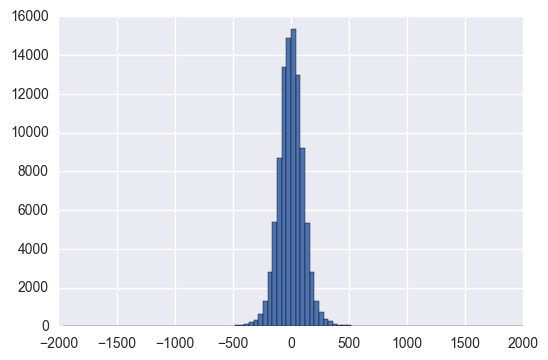

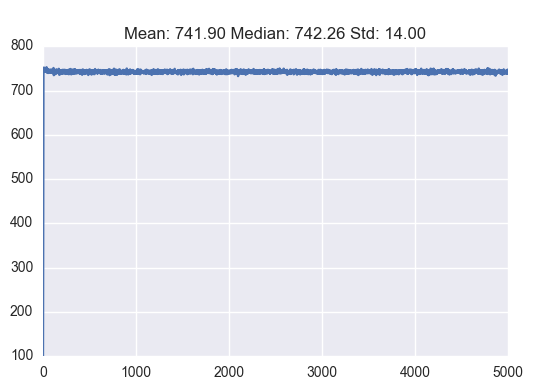

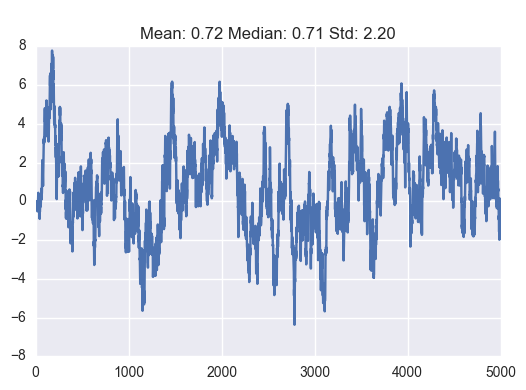

In [186]:
agt_n = np.concatenate([item["agents"] for item in test_sim.realisations])
x = plt.hist(agt_n, bins=100, range=(-2000, 2000))

plt.figure()
pop_n = np.concatenate([[item["population_n"]] for item in test_sim.realisations])
mean_pop_n = np.mean(pop_n, axis=0)
plot_series(mean_pop_n, plt.subplot(111))


plt.figure()
median_n = np.concatenate([[item["pheno_median"]] for item in test_sim.realisations])
mean_median_n = np.mean(median_n, axis=0)
plot_series(mean_median_n, plt.subplot(111))

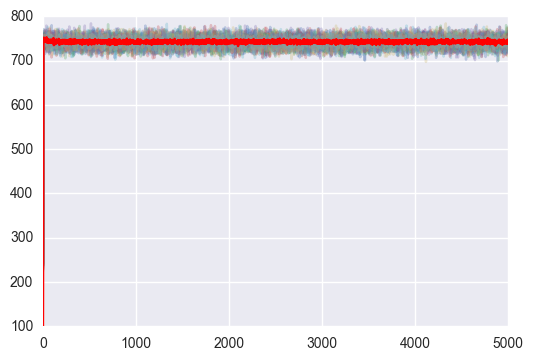

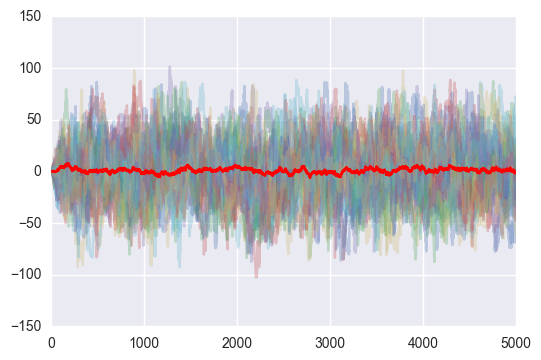

In [188]:
N = 5000
for item in test_sim.realisations[:30]:
    plt.plot(range(N), gaussian_filter1d(item["population_n"][:N], 2), alpha=0.3)
plt.plot(range(N), mean_pop_n[:N], color="r")

plt.figure()
for item in test_sim.realisations[:30]:
    plt.plot(range(N), item["pheno_median"][:N], alpha=0.3)
plt.plot(range(N), mean_median_n[:N], color="r")

In [167]:
sim2 = Simulate(num_init_agents=100, 
                    birth_rate=0.5, 
                    death_rate=0.5, 
                    selection_penalty = epsilon,
                    num_generation=5000, 
                    rv_sample_generator=stats.cauchy().rvs, 
                    init_dist=None)

In [168]:
sim2.add_realisation(5)

In [184]:
sim2.realisations[4]["population_n"]

[100,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0